# Imports

In [216]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Quickly go from Zeek log to Pandas DataFrame

In [217]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [218]:
# Create a Pandas dataframe from a Zeek log
df = pd.read_csv('/content/drive/MyDrive/Universita/Magistrale/Tesi/ZeekML/Logs/flows.csv', index_col=None)

# Print out the head of the dataframe

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 82 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   src_ip             3662 non-null   object 
 1   dst_ip             3662 non-null   object 
 2   src_port           3662 non-null   int64  
 3   dst_port           3662 non-null   int64  
 4   protocol           3662 non-null   int64  
 5   timestamp          3662 non-null   object 
 6   flow_duration      3662 non-null   float64
 7   flow_byts_s        3662 non-null   float64
 8   flow_pkts_s        3662 non-null   float64
 9   fwd_pkts_s         3662 non-null   float64
 10  bwd_pkts_s         3662 non-null   float64
 11  tot_fwd_pkts       3662 non-null   int64  
 12  tot_bwd_pkts       3662 non-null   int64  
 13  totlen_fwd_pkts    3662 non-null   int64  
 14  totlen_bwd_pkts    3662 non-null   int64  
 15  fwd_pkt_len_max    3662 non-null   float64
 16  fwd_pkt_len_min    3662 


Plottiamo il numero di ocorrenze per tipo di funzione invocata

https://github.com/amzn/zeek-plugin-s7comm/blob/master/scripts/consts.zeek

Sezione const cotp_types

#Correlation Matrix


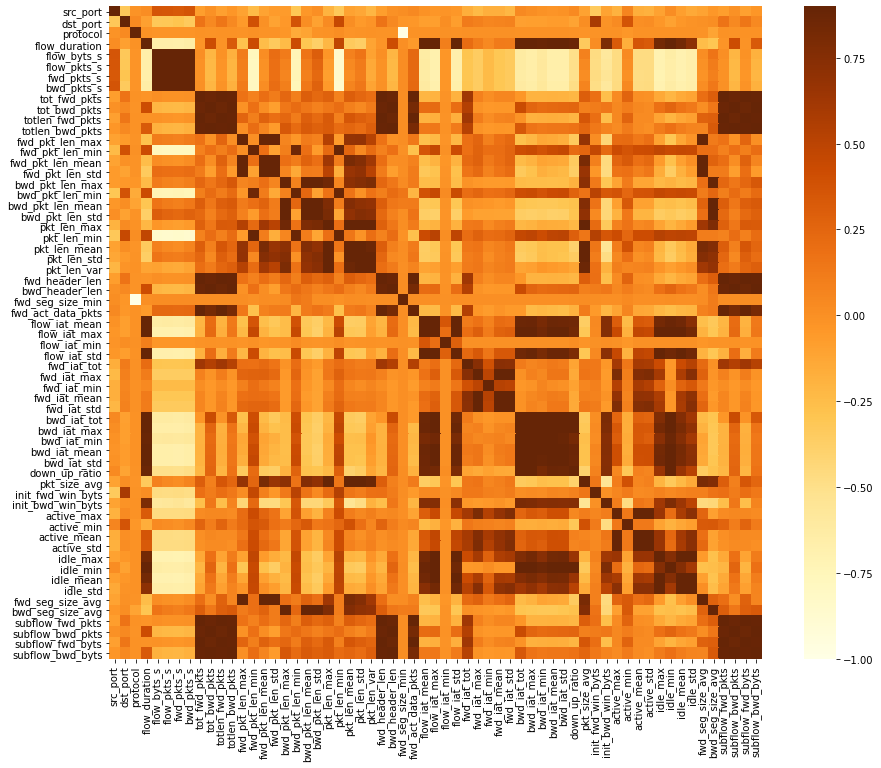

In [219]:


#Exclude objects not calculable
df_corr= df.drop(['cwe_flag_count','fwd_blk_rate_avg','bwd_blk_rate_avg','bwd_byts_b_avg','fwd_pkts_b_avg','bwd_pkts_b_avg','fwd_byts_b_avg','fwd_byts_b_avg',
                  'fwd_psh_flags','bwd_psh_flags','bwd_urg_flags','fwd_urg_flags','fin_flag_cnt','rst_flag_cnt','syn_flag_cnt','ack_flag_cnt','ece_flag_cnt',
                  'psh_flag_cnt','urg_flag_cnt'], axis=1)

correlation = df_corr.corr()
plt.subplots(figsize=(15,12))


sns.heatmap(correlation, vmax=0.9, cmap="YlOrBr", square=True)




First, we will remove all the pre-calculated mean, variance, std, min and max values for a smaller feature space.

In [220]:
cols = [col for col in list(df.columns) if 'mean' not in col and 'variance' not in col 
            and 'std' not in col and 'min' not in col and 'max' not in col and 'ip' not in col and 'timestamp' not in col]
df = df[cols]






In [221]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)
data_scaled

array([[ 6.81777734e-04, -4.76667385e-01, -1.65272325e-02, ...,
        -3.91393856e-01, -8.33273044e-02, -3.85712023e-01],
       [ 3.60424788e-01,  2.09789893e+00, -1.65272325e-02, ...,
        -3.91393856e-01, -8.33273044e-02, -3.85712023e-01],
       [ 1.76020438e-01, -4.76667385e-01, -1.65272325e-02, ...,
        -3.91393856e-01, -8.33273044e-02, -3.85712023e-01],
       ...,
       [ 5.93866272e-01, -4.76667385e-01, -1.65272325e-02, ...,
        -5.99086117e-01, -3.46550705e-01, -6.01819340e-01],
       [-1.19887367e+00,  2.09789893e+00, -1.65272325e-02, ...,
         4.39375192e-01, -6.89885576e-01,  1.62462636e-01],
       [-1.53265584e+00,  2.09789893e+00, -1.65272325e-02, ...,
         2.39906681e-02,  3.25813417e-01,  8.86698937e-02]])

Preprocessing IPs


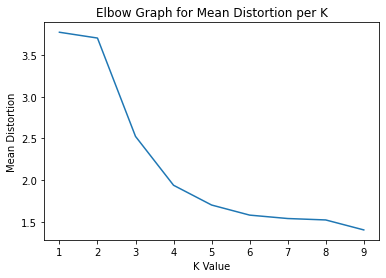

In [222]:




# using elbow graph to find out the number of k's
def find_k (X, k_range, sample_percent=1):
    """
    k_range: a list of possible k values
    X, the data we're clustering on
    """
    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.spatial.distance import cdist
    from sklearn.metrics import pairwise_distances

    N = X.shape[0]
    sampleSize = X.shape[0] * sample_percent

    if sampleSize > 0:
        index = np.arange(np.shape(X)[0])
        np.random.shuffle(index)
        X =  X[index, :]


    mean_distortions=[]
    for k in k_range:
        #cluster using k, then calculate the mean distortion (average distance to closest centroid)
        kmeans_model = KMeans(n_clusters=k, init='k-means++', n_jobs=-1).fit(X)
        mean_distortions.append(sum(np.min(pairwise_distances(X, kmeans_model.cluster_centers_,
                                                              metric='euclidean'),axis=1)) / X.shape[0])


    #visualize results
    plt.plot(k_range, mean_distortions)
    plt.xlabel("K Value")
    plt.ylabel("Mean Distortion")
    plt.title("Elbow Graph for Mean Distortion per K")
    plt.show()


find_k(np.matrix(data_scaled), range(1,10),1)

Etichettamento con k-means

In [223]:

from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=4, random_state=0)
kmeans_model.fit(data_scaled)



df['labels'] = kmeans_model.labels_



#Kmeans plot

In [ ]:
sns.scatterplot(x="x", y="y", hue="predicted_label", 
                data=df_data, palette='Paired', s=20);
plt.legend(loc='lower right');


T-sne

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3662 samples in 0.022s...
[t-SNE] Computed neighbors for 3662 samples in 0.309s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3662
[t-SNE] Computed conditional probabilities for sample 2000 / 3662
[t-SNE] Computed conditional probabilities for sample 3000 / 3662
[t-SNE] Computed conditional probabilities for sample 3662 / 3662
[t-SNE] Mean sigma: 109.486292
[t-SNE] Computed conditional probabilities in 0.391s
[t-SNE] Iteration 50: error = 87.0293732, gradient norm = 0.0000083 (50 iterations in 4.769s)
[t-SNE] Iteration 100: error = 83.4846497, gradient norm = 0.0131260 (50 iterations in 3.351s)
[t-SNE] Iteration 150: error = 62.0575638, gradient norm = 0.0027411 (50 iterations in 2.871s)
[t-SNE] Iteration 200: error = 58.4063187, gradient norm = 0.0013506 (50 iterations in 2.786s)
[t-SNE] Iteration 250: error = 56.9993248, gradient norm = 0.0009039 (50 iterations in 2.759s)
[t-SNE] KL divergence after 250 itera

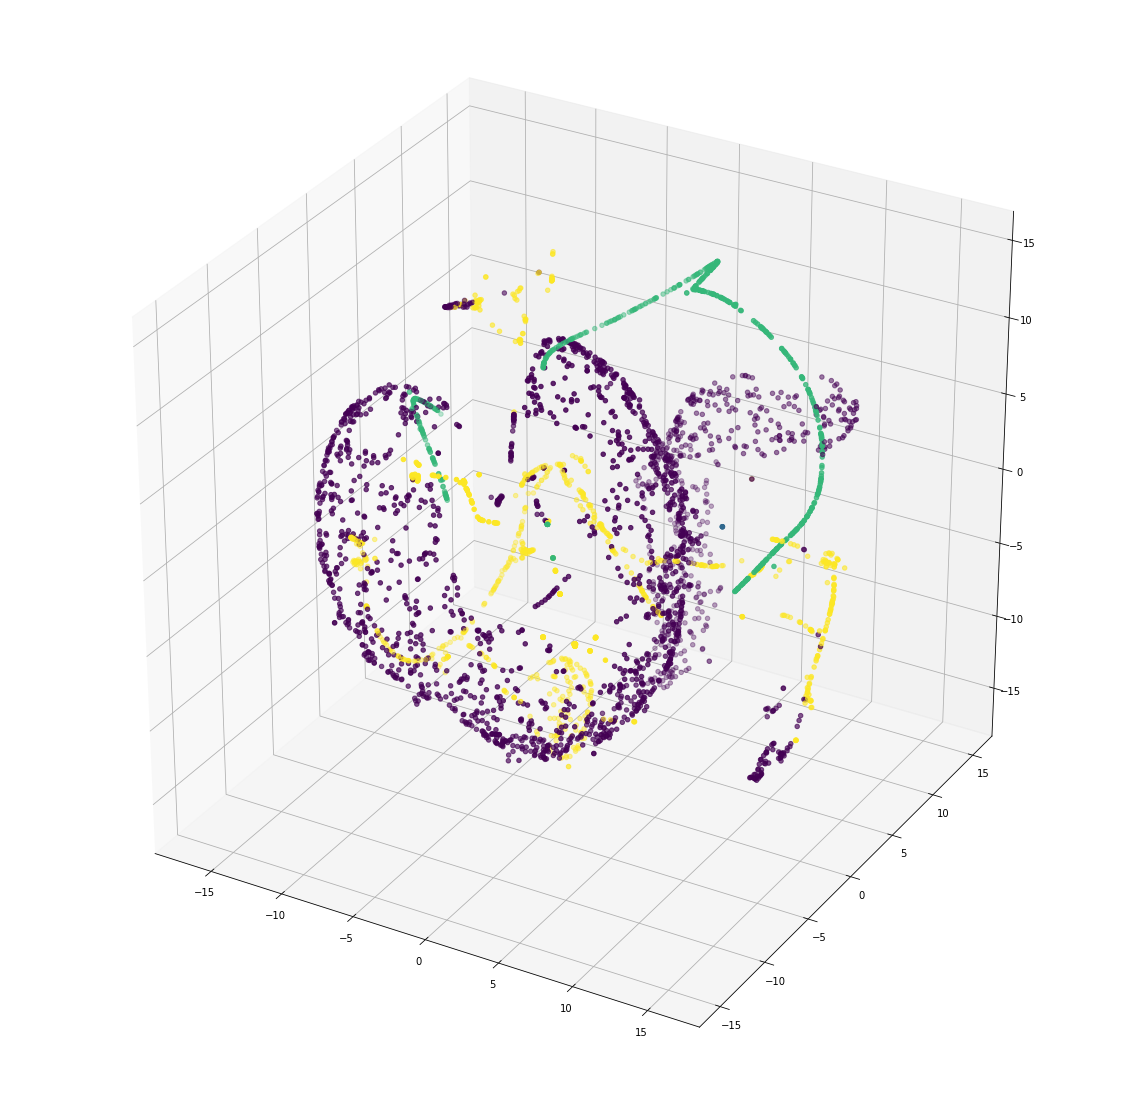

In [224]:

df.shape
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

model = TSNE(n_components=3, learning_rate=10, random_state=10,verbose=2,n_jobs=2)
X_tsne = model.fit_transform(df) 
plt.figure(figsize=(20,20))
ax = plt.subplot(111, projection='3d')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1],X_tsne[:,2], c=kmeans_model.labels_)



#Data Label 1

In [225]:
df[df['labels'] == 1].head()

,src_port,dst_port,protocol,flow_duration,flow_byts_s,flow_pkts_s,fwd_pkts_s,bwd_pkts_s,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,pkt_len_var,fwd_header_len,bwd_header_len,fwd_act_data_pkts,fwd_iat_tot,bwd_iat_tot,fwd_psh_flags,bwd_psh_flags,fwd_urg_flags,bwd_urg_flags,fin_flag_cnt,syn_flag_cnt,rst_flag_cnt,psh_flag_cnt,ack_flag_cnt,urg_flag_cnt,ece_flag_cnt,down_up_ratio,pkt_size_avg,init_fwd_win_byts,init_bwd_win_byts,fwd_byts_b_avg,fwd_pkts_b_avg,bwd_byts_b_avg,bwd_pkts_b_avg,fwd_blk_rate_avg,bwd_blk_rate_avg,fwd_seg_size_avg,bwd_seg_size_avg,cwe_flag_count,subflow_fwd_pkts,subflow_bwd_pkts,subflow_fwd_byts,subflow_bwd_byts,labels
241,46939,502,6,71127931.0,260.966399,3.458557,1.658983,1.799574,118,128,8954,9608,19.947188,2360,2560,93,71127931.0,70540843.0,0,0,0,0,1,0,0,0,0,0,0,1.084746,75.455285,64240,509,0.0,0.0,0.0,0.0,0.0,0.0,75.881356,75.062500,0,118,128,8954,9608,1
242,59069,502,6,115941848.0,242.552629,3.148130,1.466252,1.681878,170,195,13439,14683,24.866324,3400,3900,144,115941848.0,115381071.0,0,0,0,0,1,0,0,0,0,0,0,1.147059,77.046575,64240,509,0.0,0.0,0.0,0.0,0.0,0.0,79.052941,75.297436,0,170,195,13439,14683,1
243,40941,502,6,72122286.0,236.196063,3.119701,1.594514,1.525187,115,110,8696,8339,17.876543,2300,2200,87,72122286.0,71558354.0,0,0,0,0,1,0,0,0,0,0,0,0.956522,75.711111,64240,509,0.0,0.0,0.0,0.0,0.0,0.0,75.617391,75.809091,0,115,110,8696,8339,1


In [226]:
df[df['labels'] == 2]

,src_port,dst_port,protocol,flow_duration,flow_byts_s,flow_pkts_s,fwd_pkts_s,bwd_pkts_s,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,pkt_len_var,fwd_header_len,bwd_header_len,fwd_act_data_pkts,fwd_iat_tot,bwd_iat_tot,fwd_psh_flags,bwd_psh_flags,fwd_urg_flags,bwd_urg_flags,fin_flag_cnt,syn_flag_cnt,rst_flag_cnt,psh_flag_cnt,ack_flag_cnt,urg_flag_cnt,ece_flag_cnt,down_up_ratio,pkt_size_avg,init_fwd_win_byts,init_bwd_win_byts,fwd_byts_b_avg,fwd_pkts_b_avg,bwd_byts_b_avg,bwd_pkts_b_avg,fwd_blk_rate_avg,bwd_blk_rate_avg,fwd_seg_size_avg,bwd_seg_size_avg,cwe_flag_count,subflow_fwd_pkts,subflow_bwd_pkts,subflow_fwd_byts,subflow_bwd_byts,labels
172,61953,102,6,32200792.0,19.129964,0.310551,0.186331,0.124221,6,4,396,220,51.840000,120,80,6,32200792.0,22147397.0,0,0,0,0,1,0,0,0,0,0,0,0.666667,61.600000,1024,64186,0.0,0.0,0.0,0.0,0.0,0.0,66.0,55.0,0,6,4,396,220,2
173,56583,502,6,32103943.0,12.708719,0.218042,0.031149,0.186893,1,6,60,348,0.489796,20,120,1,0.0,32103570.0,0,0,0,0,1,0,0,0,0,0,0,6.000000,58.285714,65535,64240,0.0,0.0,0.0,0.0,0.0,0.0,60.0,58.0,0,1,6,60,348,2
175,56079,102,6,32190417.0,12.674580,0.217456,0.031065,0.186391,1,6,60,348,0.489796,20,120,1,0.0,32190265.0,0,0,0,0,1,0,0,0,0,0,0,6.000000,58.285714,65535,64240,0.0,0.0,0.0,0.0,0.0,0.0,60.0,58.0,0,1,6,60,348,2
177,40256,102,6,32187613.0,12.675684,0.217475,0.031068,0.186407,1,6,60,348,0.489796,20,120,1,0.0,32187459.0,0,0,0,0,1,0,0,0,0,0,0,6.000000,58.285714,65535,64240,0.0,0.0,0.0,0.0,0.0,0.0,60.0,58.0,0,1,6,60,348,2
179,50448,102,6,32071686.0,12.721501,0.218261,0.031180,0.187081,1,6,60,348,0.489796,20,120,1,0.0,32071532.0,0,0,0,0,1,0,0,0,0,0,0,6.000000,58.285714,29200,64240,0.0,0.0,0.0,0.0,0.0,0.0,60.0,58.0,0,1,6,60,348,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3594,35646,502,6,32274103.0,12.641715,0.216892,0.030985,0.185908,1,6,60,348,0.489796,20,120,1,0.0,32273692.0,0,0,0,0,1,0,0,0,0,0,0,6.000000,58.285714,65535,64240,0.0,0.0,0.0,0.0,0.0,0.0,60.0,58.0,0,1,6,60,348,2
3596,34555,102,6,31925004.0,12.779951,0.219264,0.031323,0.187940,1,6,60,348,0.489796,20,120,1,0.0,31924827.0,0,0,0,0,1,0,0,0,0,0,0,6.000000,58.285714,65535,64240,0.0,0.0,0.0,0.0,0.0,0.0,60.0,58.0,0,1,6,60,348,2
3598,52401,102,6,31982730.0,12.756885,0.218868,0.031267,0.187601,1,6,60,348,0.489796,20,120,1,0.0,31982550.0,0,0,0,0,1,0,0,0,0,0,0,6.000000,58.285714,65535,64240,0.0,0.0,0.0,0.0,0.0,0.0,60.0,58.0,0,1,6,60,348,2
3607,42843,102,6,32469510.0,12.565635,0.215587,0.030798,0.184789,1,6,60,348,0.489796,20,120,1,0.0,32469339.0,0,0,0,0,1,0,0,0,0,0,0,6.000000,58.285714,65535,64240,0.0,0.0,0.0,0.0,0.0,0.0,60.0,58.0,0,1,6,60,348,2


In [227]:
df[df['labels'] == 3]

,src_port,dst_port,protocol,flow_duration,flow_byts_s,flow_pkts_s,fwd_pkts_s,bwd_pkts_s,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,pkt_len_var,fwd_header_len,bwd_header_len,fwd_act_data_pkts,fwd_iat_tot,bwd_iat_tot,fwd_psh_flags,bwd_psh_flags,fwd_urg_flags,bwd_urg_flags,fin_flag_cnt,syn_flag_cnt,rst_flag_cnt,psh_flag_cnt,ack_flag_cnt,urg_flag_cnt,ece_flag_cnt,down_up_ratio,pkt_size_avg,init_fwd_win_byts,init_bwd_win_byts,fwd_byts_b_avg,fwd_pkts_b_avg,bwd_byts_b_avg,bwd_pkts_b_avg,fwd_blk_rate_avg,bwd_blk_rate_avg,fwd_seg_size_avg,bwd_seg_size_avg,cwe_flag_count,subflow_fwd_pkts,subflow_bwd_pkts,subflow_fwd_byts,subflow_bwd_byts,labels
0,53534,102,6,398093.0,1034.934048,15.071855,10.047903,5.023952,4,2,272,140,14.222222,80,40,0,398093.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0.500000,68.666667,14600,510,0.0,0.0,0.0,0.0,0.0,0.0,68.000000,70.0,0,4,2,272,140,3
1,57026,502,6,393550.0,1046.880955,15.245839,10.163893,5.081946,4,2,272,140,14.222222,80,40,0,393550.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0.500000,68.666667,14600,510,0.0,0.0,0.0,0.0,0.0,0.0,68.000000,70.0,0,4,2,272,140,3
2,55236,102,6,396969.0,1037.864418,15.114530,10.076354,5.038177,4,2,272,140,14.222222,80,40,0,396969.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0.500000,68.666667,14600,510,0.0,0.0,0.0,0.0,0.0,0.0,68.000000,70.0,0,4,2,272,140,3
3,58702,502,6,393809.0,1046.192444,15.235812,10.157208,5.078604,4,2,272,140,14.222222,80,40,0,393809.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0.500000,68.666667,14600,510,0.0,0.0,0.0,0.0,0.0,0.0,68.000000,70.0,0,4,2,272,140,3
4,57601,502,6,392606.0,1049.398124,15.282497,10.188331,5.094166,4,2,272,140,14.222222,80,40,0,392606.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0.500000,68.666667,14600,510,0.0,0.0,0.0,0.0,0.0,0.0,68.000000,70.0,0,4,2,272,140,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3655,36896,502,6,3930423.0,184.204092,2.544255,1.526553,1.017702,6,4,412,312,138.240000,120,80,1,3930423.0,3736226.0,0,0,0,0,1,0,0,0,0,0,0,0.666667,72.400000,29200,509,0.0,0.0,0.0,0.0,0.0,0.0,68.666667,78.0,0,6,4,412,312,3
3656,37342,502,6,3513787.0,209.176026,2.845932,1.707559,1.138373,6,4,415,320,199.050000,120,80,1,3513787.0,3319446.0,0,0,0,0,1,0,0,0,0,0,0,0.666667,73.500000,29200,509,0.0,0.0,0.0,0.0,0.0,0.0,69.166667,80.0,0,6,4,415,320,3
3657,37580,502,6,837180.0,864.808046,11.944863,7.166918,4.777945,6,4,412,312,138.240000,120,80,1,837180.0,643088.0,0,0,0,0,1,0,0,0,0,0,0,0.666667,72.400000,29200,509,0.0,0.0,0.0,0.0,0.0,0.0,68.666667,78.0,0,6,4,412,312,3
3658,37696,502,6,193519.0,1074.829862,15.502354,10.334903,5.167451,2,1,134,74,43.555556,40,20,1,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0.500000,69.333333,29200,65160,0.0,0.0,0.0,0.0,0.0,0.0,67.000000,74.0,0,2,1,134,74,3


In [228]:
df[df['labels'] == 0]

,src_port,dst_port,protocol,flow_duration,flow_byts_s,flow_pkts_s,fwd_pkts_s,bwd_pkts_s,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,pkt_len_var,fwd_header_len,bwd_header_len,fwd_act_data_pkts,fwd_iat_tot,bwd_iat_tot,fwd_psh_flags,bwd_psh_flags,fwd_urg_flags,bwd_urg_flags,fin_flag_cnt,syn_flag_cnt,rst_flag_cnt,psh_flag_cnt,ack_flag_cnt,urg_flag_cnt,ece_flag_cnt,down_up_ratio,pkt_size_avg,init_fwd_win_byts,init_bwd_win_byts,fwd_byts_b_avg,fwd_pkts_b_avg,bwd_byts_b_avg,bwd_pkts_b_avg,fwd_blk_rate_avg,bwd_blk_rate_avg,fwd_seg_size_avg,bwd_seg_size_avg,cwe_flag_count,subflow_fwd_pkts,subflow_bwd_pkts,subflow_fwd_byts,subflow_bwd_byts,labels
9,38600,102,6,0.0,0.000000,0.000000,0.000000,0.000000,1,0,66,0,0.000000,20,0,0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0.000000,66.000000,502,0,0.0,0.0,0.0,0.0,0.0,0.0,66.000000,0.0,0,1,0,66,0,0
10,49254,502,6,66189.0,6632.522020,75.541253,45.324752,30.216501,3,2,299,140,1280.160000,60,40,1,65941.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0.666667,87.800000,64240,509,0.0,0.0,0.0,0.0,0.0,0.0,99.666667,70.0,0,3,2,299,140,0
11,49254,502,6,57133.0,3465.597816,52.509058,35.006039,17.503019,2,1,132,66,0.000000,40,20,0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0.500000,66.000000,502,509,0.0,0.0,0.0,0.0,0.0,0.0,66.000000,66.0,0,2,1,132,66,0
57,31271,102,6,142264.0,1251.194961,21.087556,14.058370,7.029185,2,1,120,58,0.888889,40,20,2,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0.500000,59.333333,1024,64240,0.0,0.0,0.0,0.0,0.0,0.0,60.000000,58.0,0,2,1,120,58,0
59,6707,502,6,46566.0,3822.531461,64.424688,42.949792,21.474896,2,1,120,58,0.888889,40,20,2,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0.500000,59.333333,22949,64240,0.0,0.0,0.0,0.0,0.0,0.0,60.000000,58.0,0,2,1,120,58,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3617,48666,502,6,54847.0,5323.901034,91.162689,54.697613,36.465076,3,2,180,112,5.440000,60,40,3,54663.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0.666667,58.400000,1024,0,0.0,0.0,0.0,0.0,0.0,0.0,60.000000,56.0,0,3,2,180,112,0
3618,47297,102,6,144714.0,1230.012300,20.730544,13.820363,6.910181,2,1,120,58,0.888889,40,20,2,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0.500000,59.333333,1024,64240,0.0,0.0,0.0,0.0,0.0,0.0,60.000000,58.0,0,2,1,120,58,0
3622,59292,502,6,50056.0,4754.674764,79.910500,59.932875,19.977625,3,1,180,58,0.750000,60,20,3,50056.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0.333333,59.500000,1024,64240,0.0,0.0,0.0,0.0,0.0,0.0,60.000000,58.0,0,3,1,180,58,0
3623,29683,102,6,141207.0,1260.560737,21.245406,14.163604,7.081802,2,1,120,58,0.888889,40,20,2,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0.500000,59.333333,1024,64240,0.0,0.0,0.0,0.0,0.0,0.0,60.000000,58.0,0,2,1,120,58,0
